In [7]:
# make some useful plots
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from donutlib.decamutil import decaminfo
dinfo = decaminfo()
infoDict = dinfo.infoDict


In [8]:
from meshutil import mkDonutAna
meshNameS = "Science-20121120s1-v20i2_All"
daS = mkDonutAna(meshNameS,"ScienceOnly","idw",directory="/u/ec/roodman/Astrophysics/Donuts/ComboMeshesv20",methodVal=(250,1.0),nInterpGrid=32)

<IPython.core.display.Javascript object>


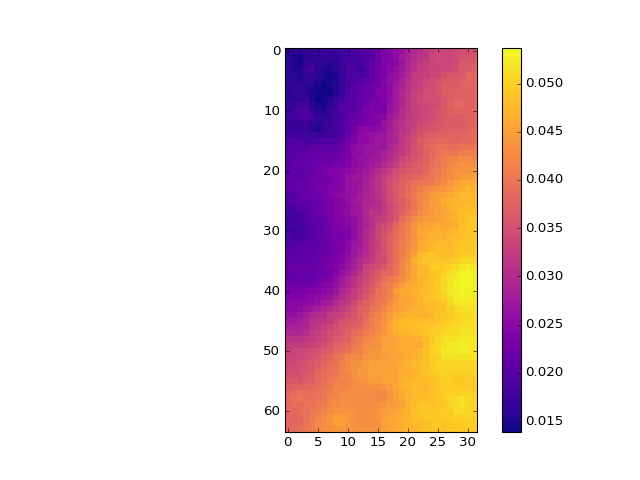

In [9]:
plt.figure()
pm = daS.meshDict['z5Mesh']
plt.imshow(pm.interpValues['S9'],interpolation='none',cmap="plasma")
plt.colorbar()

<IPython.core.display.Javascript object>


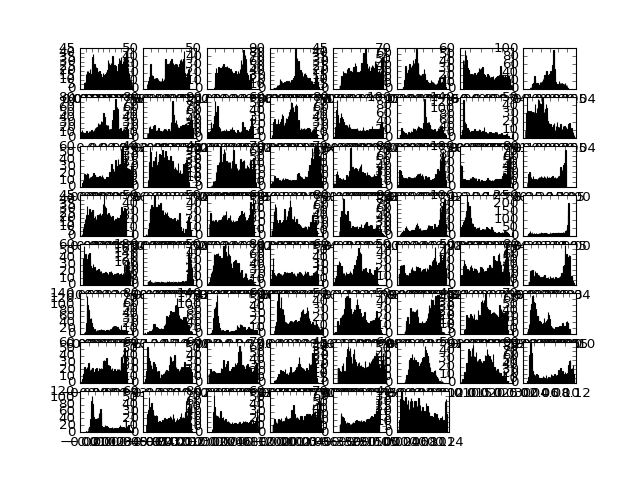

In [10]:
pm = daS.meshDict['z5Mesh']
f = plt.figure()

interpval_dict = pm.interpValues
iax = 1
for sensor in interpval_dict.keys():
    vals = interpval_dict[sensor].flatten()
    f.add_subplot(8,8,iax)
    plt.hist(vals,bins=100)
    iax = iax + 1



<IPython.core.display.Javascript object>


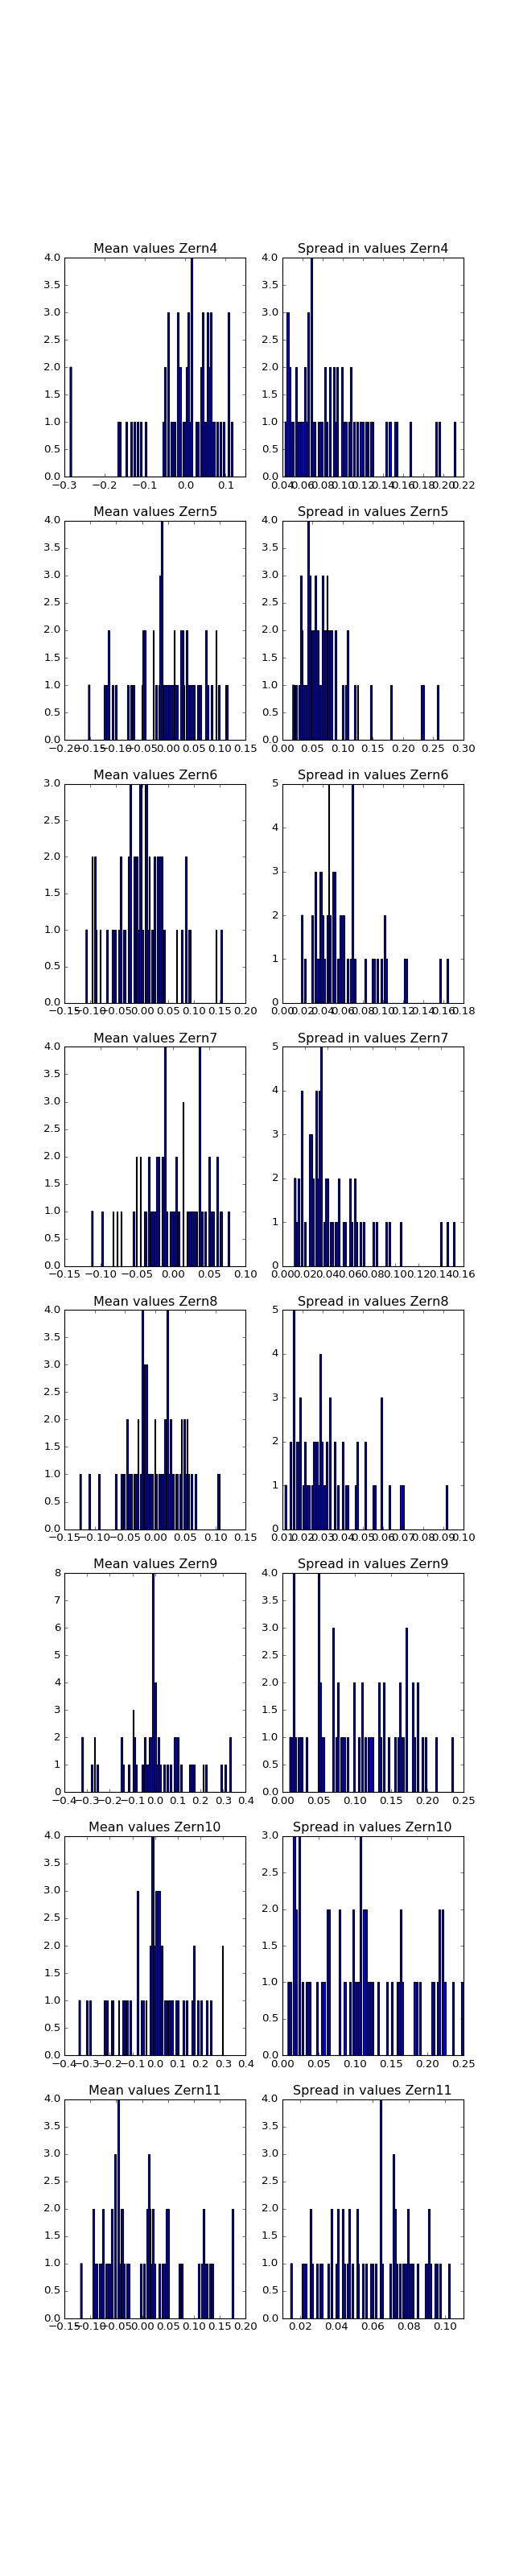

Zern 4, Mean,Stdev of Mean = -0.005,0.085 , Lo,Hi of Spread = 0.043,0.212 
Zern 5, Mean,Stdev of Mean = -0.002,0.062 , Lo,Hi of Spread = 0.018,0.259 
Zern 6, Mean,Stdev of Mean = 0.000,0.054 , Lo,Hi of Spread = 0.019,0.165 
Zern 7, Mean,Stdev of Mean = -0.001,0.042 , Lo,Hi of Spread = 0.011,0.152 
Zern 8, Mean,Stdev of Mean = 0.001,0.044 , Lo,Hi of Spread = 0.011,0.092 
Zern 9, Mean,Stdev of Mean = -0.002,0.144 , Lo,Hi of Spread = 0.011,0.236 
Zern 10, Mean,Stdev of Mean = -0.003,0.136 , Lo,Hi of Spread = 0.008,0.249 
Zern 11, Mean,Stdev of Mean = 0.002,0.073 , Lo,Hi of Spread = 0.015,0.103 


In [13]:
# get mean and max-min for each sensor

f = plt.figure(figsize=(8,40))

for iZ in range(4,11+1,1):
    pm = daS.meshDict['z%dMesh' % (iZ)]

    x_vals = []
    y_vals = []
    mean_vals = []
    spread_vals = []

    interpval_dict = pm.interpValues
    for sensor in interpval_dict.keys():
        vals = interpval_dict[sensor].flatten()
        if iZ==4:
            vals = vals / 172.0
        mean_vals.append(vals.mean())
        spread_vals.append(vals.max() - vals.min())

    f.add_subplot(8,2,1+(iZ-4)*2)
    h = plt.hist(mean_vals,bins=100)
    plt.title("Mean values Zern%d" % (iZ))
    f.add_subplot(8,2,2+(iZ-4)*2)
    plt.title("Spread in values Zern%d" % (iZ))
    h = plt.hist(spread_vals,bins=100)
    
    # get std of means, and spread of stds...
    mean_avals = np.array(mean_vals)
    spread_avals = np.array(spread_vals)
    print "Zern %d, Mean,Stdev of Mean = %.3f,%.3f , Lo,Hi of Spread = %.3f,%.3f " % (iZ,mean_avals.mean(),mean_avals.std(),spread_avals.min(),spread_avals.max())  
